In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
df = pd.read_csv("fitness_class.csv")
df

,Unnamed: 0,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,0,1,17,79.56,8,Wed,PM,Strength,0
1,1,2,10,79.01,2,Mon,AM,HIIT,0
2,2,3,16,74.53,14,Sun,AM,Strength,0
3,3,4,5,86.12,10,Fri,AM,Cycling,0
4,4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...,...
1495,1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1498,1499,34,68.64,14,Sun,AM,Aqua,0


In [6]:
#Checking for null values
df.isnull().sum()

Unnamed: 0           0
booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [9]:
#checking the data types
df.dtypes

Unnamed: 0            int64
booking_id            int64
months_as_member      int64
weight              float64
days_before          object
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [11]:
#first five rows
df.head()

,Unnamed: 0,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,0,1,17,79.56,8,Wed,PM,Strength,0
1,1,2,10,79.01,2,Mon,AM,HIIT,0
2,2,3,16,74.53,14,Sun,AM,Strength,0
3,3,4,5,86.12,10,Fri,AM,Cycling,0
4,4,5,15,69.29,8,Thu,AM,HIIT,0


In [13]:
#last five rows
df.tail()

,Unnamed: 0,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
1495,1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1498,1499,34,68.64,14,Sun,AM,Aqua,0
1499,1499,1500,20,94.39,8,Thu,AM,Cycling,1


In [15]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1500 non-null   int64  
 1   booking_id        1500 non-null   int64  
 2   months_as_member  1500 non-null   int64  
 3   weight            1480 non-null   float64
 4   days_before       1500 non-null   object 
 5   day_of_week       1500 non-null   object 
 6   time              1500 non-null   object 
 7   category          1500 non-null   object 
 8   attended          1500 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 105.6+ KB


In [17]:
#describe
df.describe()

,Unnamed: 0,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1500.000000,1480.000000,1500.000000
mean,749.500000,750.500000,15.628667,82.610378,0.302667
std,433.157015,433.157015,12.926543,12.765859,0.459565
min,0.000000,1.000000,1.000000,55.410000,0.000000
25%,374.750000,375.750000,8.000000,73.490000,0.000000
50%,749.500000,750.500000,12.000000,80.760000,0.000000
75%,1124.250000,1125.250000,19.000000,89.520000,1.000000
max,1499.000000,1500.000000,148.000000,170.520000,1.000000


In [7]:
#Checking the columns
df.columns

Index(['Unnamed: 0', 'booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'time', 'category', 'attended'],
      dtype='object')

In [8]:
#cleaning the data
df['weight'] = df['weight'].fillna(df['weight'].mean())

In [10]:
df.isnull().sum()

Unnamed: 0          0
booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [12]:
#dropping unwanted columns
df = df.drop('Unnamed: 0', axis = 1)
df

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


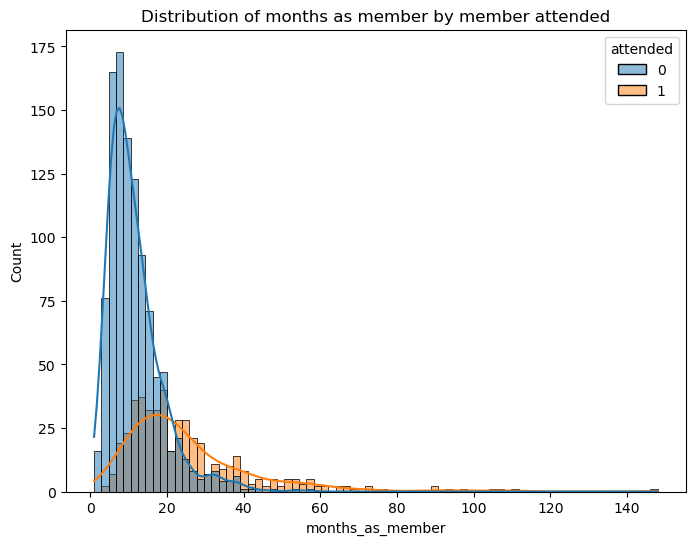

In [17]:
#Data visualization


#histplot
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='months_as_member', hue='attended',kde=True)
plt.title("Distribution of months as member by member attended")
plt.show()

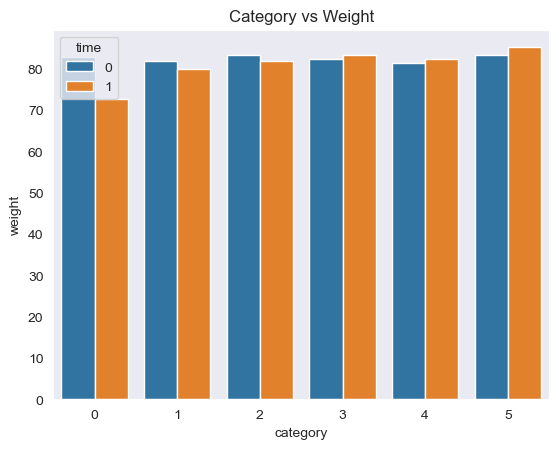

In [109]:
#barplot
sns.barplot(data=df, x='category', y='weight',hue = 'time',errorbar=None)
plt.title("Category vs Weight")
plt.show()

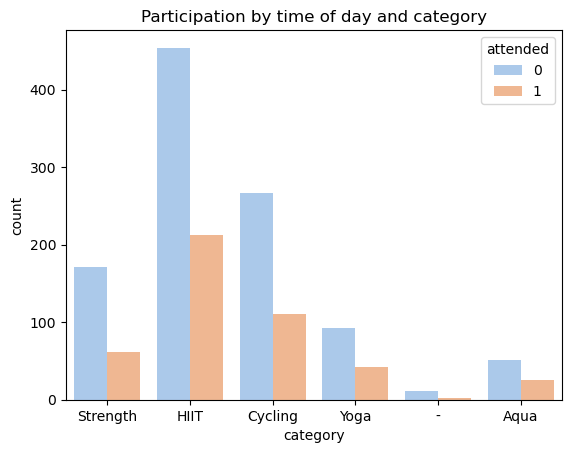

In [14]:
#countplot
sns.countplot(data=df, x='category', hue='attended',palette = 'pastel')
plt.title("Participation by time of day and category")
plt.show()

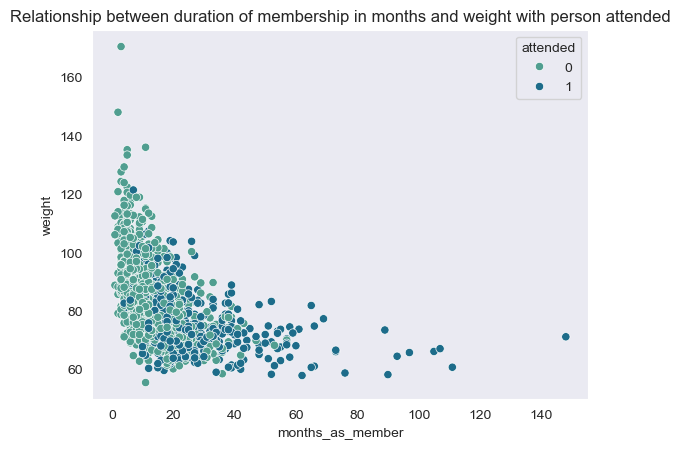

In [20]:
#scatterplot
sns.scatterplot(data=df, x='months_as_member', y='weight', hue='attended',palette = 'crest')
plt.title("Relationship between duration of membership in months and weight with person attended")
plt.show()

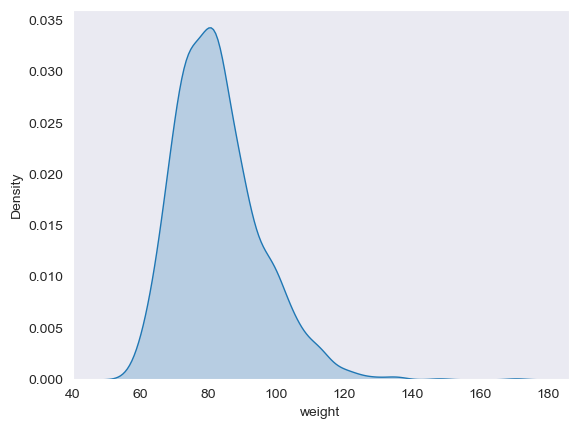

In [18]:
#kde plot
sns.set_style('dark')
sns.kdeplot(data=df, x='weight', fill=True)
plt.show()

In [22]:
#Label Encoding
le = LabelEncoder()

for i in ('days_before','day_of_week', 'time', 'category'):
    df[i] = le.fit_transform(df[i])
    df

In [24]:
df

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,28,8,1,4,0
1,2,10,79.01,14,2,0,3,0
2,3,16,74.53,9,5,0,4,0
3,4,5,86.12,2,0,0,2,0
4,5,15,69.29,28,6,0,3,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,2,0,0,3,0
1496,1497,29,89.55,14,2,0,4,0
1497,1498,9,87.38,20,7,0,3,0
1498,1499,34,68.64,9,5,0,1,0


In [26]:
#Finding the co-relation
cor = df.corr()
cor

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
booking_id,1.000000,0.007612,-0.009748,0.032366,0.029903,0.056022,-0.032492,0.026693
months_as_member,0.007612,1.000000,-0.465594,-0.001747,-0.005037,-0.011570,-0.010739,0.485526
weight,-0.009748,-0.465594,1.000000,0.003808,-0.016756,0.006460,0.009824,-0.283521
days_before,0.032366,-0.001747,0.003808,1.000000,0.724415,0.250661,-0.021613,-0.006260
day_of_week,0.029903,-0.005037,-0.016756,0.724415,1.000000,0.368330,-0.022025,-0.010920
time,0.056022,-0.011570,0.006460,0.250661,0.368330,1.000000,-0.036200,-0.049850
category,-0.032492,-0.010739,0.009824,-0.021613,-0.022025,-0.036200,1.000000,-0.000893
attended,0.026693,0.485526,-0.283521,-0.006260,-0.010920,-0.049850,-0.000893,1.000000


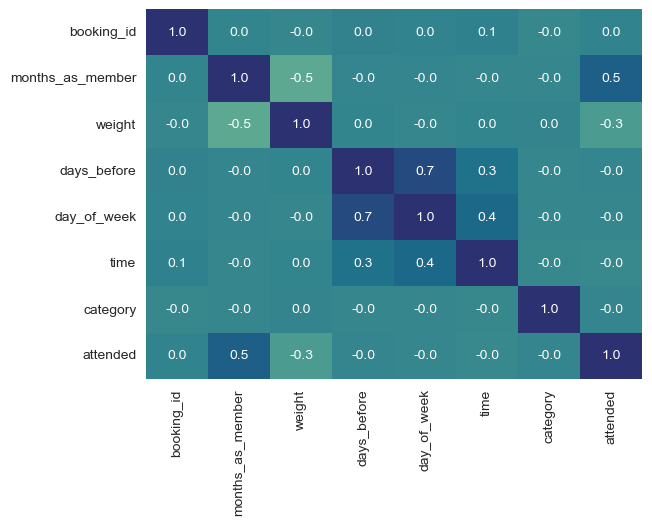

In [28]:
#heatmap
sns.heatmap(cor,annot = True,annot_kws={'size':10},fmt='.1f',vmin=-1,vmax=1,cmap="crest",cbar=False)
plt.show()

In [30]:
#Feature selection
#independent columns
x = df[['booking_id', 'months_as_member', 'weight', 'days_before','day_of_week', 'time', 'category']]

In [32]:
#dependent feature
y = df['attended']

In [34]:
#Standardise the feature
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [36]:
#split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1200, 7)
(300, 7)
(1200,)
(300,)


In [38]:
#KNN classifier
k=2
knn= KNeighborsClassifier(n_neighbors = k) #euclideon distance
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [43]:
#step 4: predict the model
y_pred = knn.predict(x_test)
print(y_pred)
print(y_test)

[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0]
1116    1
1368    1
422     0
413     0
451     0
       ..
983     1
799     1
1265    0
1150    1
824     0
Name: attended, Length: 300, dtype: int64


In [45]:
#evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix is:\n{conf_matrix}")

acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score : {acc_score*100}")

class_report = classification_report(y_test, y_pred)
print(f"Classification report: {class_report}")

Confusion matrix is:
[[185  12]
 [ 73  30]]
Accuracy Score : 71.66666666666667
Classification report:               precision    recall  f1-score   support

           0       0.72      0.94      0.81       197
           1       0.71      0.29      0.41       103

    accuracy                           0.72       300
   macro avg       0.72      0.62      0.61       300
weighted avg       0.72      0.72      0.68       300



In [40]:
#Predicting attendance for new data
new_data = np.array([[1,17,	79.56,	28,	8,	1,	4]])
predicted_knn = knn.predict(new_data)
print(f"Predicted knn:{predicted_knn[0]}")

Predicted knn:0


In [44]:
#Decision tree classifier
tree_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [46]:
#predict model
y_pred = tree_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], d

In [48]:
y_test

1116    1
1368    1
422     0
413     0
451     0
       ..
983     1
799     1
1265    0
1150    1
824     0
Name: attended, Length: 300, dtype: int64

In [50]:
#evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix is:\n{conf_matrix}")

acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score : {acc_score*100}")

class_report = classification_report(y_test, y_pred)
print(f"Classification report: {class_report}")

Confusion matrix is:
[[186  11]
 [ 60  43]]
Accuracy Score : 76.33333333333333
Classification report:               precision    recall  f1-score   support

           0       0.76      0.94      0.84       197
           1       0.80      0.42      0.55       103

    accuracy                           0.76       300
   macro avg       0.78      0.68      0.69       300
weighted avg       0.77      0.76      0.74       300



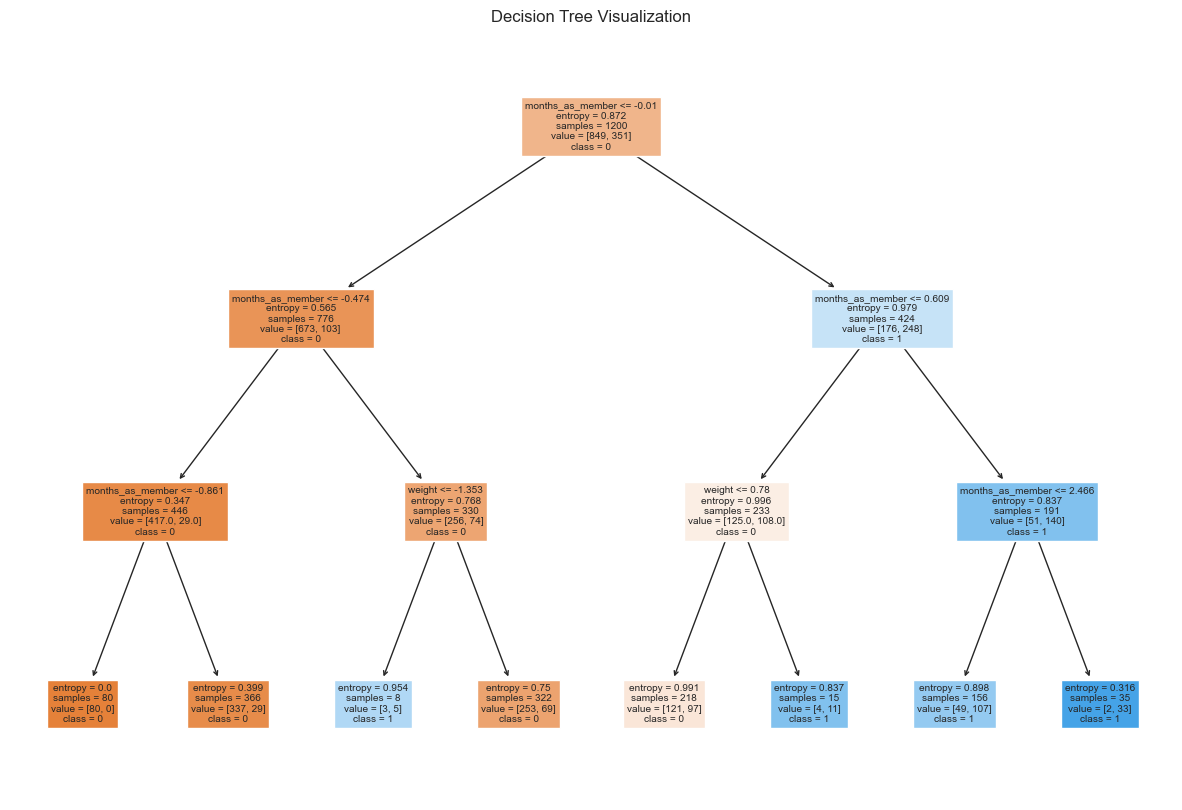

In [56]:
#Visualize the decision tree
plt.figure(figsize=(15,10))
plot_tree(
    tree_model,
    filled=True,
    feature_names=x.columns,
    class_names=[str(cls) for cls in tree_model.classes_],
    )

plt.title("Decision Tree Visualization")
plt.show()

In [61]:
#Random Forest Classifier
model= RandomForestClassifier(n_estimators=10, criterion = 'entropy')
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [63]:
#evaluate the model
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], d

In [65]:
y_test

1116    1
1368    1
422     0
413     0
451     0
       ..
983     1
799     1
1265    0
1150    1
824     0
Name: attended, Length: 300, dtype: int64

In [67]:
#evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix is:\n{conf_matrix}")

acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score : {acc_score*100}")

class_report = classification_report(y_test, y_pred)
print(f"Classification report: {class_report}")

Confusion matrix is:
[[178  19]
 [ 57  46]]
Accuracy Score : 74.66666666666667
Classification report:               precision    recall  f1-score   support

           0       0.76      0.90      0.82       197
           1       0.71      0.45      0.55       103

    accuracy                           0.75       300
   macro avg       0.73      0.68      0.69       300
weighted avg       0.74      0.75      0.73       300



In [69]:
#SVM algorithm
model = SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [71]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], d

In [73]:
#evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix is:\n{conf_matrix}")

acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score : {acc_score*100}")

class_report = classification_report(y_test, y_pred)
print(f"Classification report: {class_report}")

Confusion matrix is:
[[189   8]
 [ 65  38]]
Accuracy Score : 75.66666666666667
Classification report:               precision    recall  f1-score   support

           0       0.74      0.96      0.84       197
           1       0.83      0.37      0.51       103

    accuracy                           0.76       300
   macro avg       0.79      0.66      0.67       300
weighted avg       0.77      0.76      0.73       300



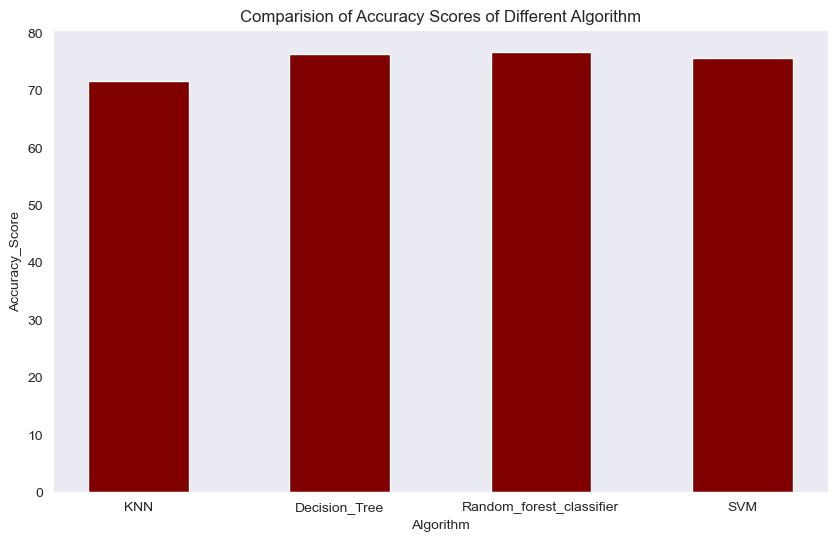

In [121]:
data = {'KNN':71.666, 'Decision_Tree':76.333, 'Random_forest_classifier':76.666,'SVM':75.666}
Algorithm= list(data.keys())
Accuracy_Score=list(data.values())
plt.figure(figsize =(10,6))
sns.set_style('dark')
plt.bar(Algorithm,Accuracy_Score,color='maroon',width = 0.5) #vertical graph
plt.xlabel("Algorithm")
plt.ylabel("Accuracy_Score")
plt.title("Comparision of Accuracy Scores of Different Algorithm")
plt.show()

In [85]:
#creating dictionary using algorith names as key and accuracy score as values
data

{'KNN': 71.666,
 'Decision_Tree': 76.333,
 'Random_forest_tree': 76.666,
 'SVM': 75.666}

In [87]:
new_df = pd.DataFrame({
    'booking_id':df['booking_id'],
    'weight':df['weight'],
    'category':df['category']
})

new_df

,booking_id,weight,category
0,1,79.56,4
1,2,79.01,3
2,3,74.53,4
3,4,86.12,2
4,5,69.29,3
...,...,...,...
1495,1496,79.51,3
1496,1497,89.55,4
1497,1498,87.38,3
1498,1499,68.64,1


In [91]:
#independent variables
x = df[['weight','category']]
x

,weight,category
0,79.56,4
1,79.01,3
2,74.53,4
3,86.12,2
4,69.29,3
...,...,...
1495,79.51,3
1496,89.55,4
1497,87.38,3
1498,68.64,1


In [101]:
k=5
kmeans=KMeans(n_clusters=k,random_state=0)
kmeans.fit(x)

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [103]:
labels=kmeans.labels_
df['cluster']=labels
df['cluster']

0       0
1       0
2       0
3       4
4       3
       ..
1495    0
1496    4
1497    4
1498    3
1499    1
Name: cluster, Length: 1500, dtype: int32

In [105]:
new_df

,booking_id,weight,category
0,1,79.56,4
1,2,79.01,3
2,3,74.53,4
3,4,86.12,2
4,5,69.29,3
...,...,...,...
1495,1496,79.51,3
1496,1497,89.55,4
1497,1498,87.38,3
1498,1499,68.64,1


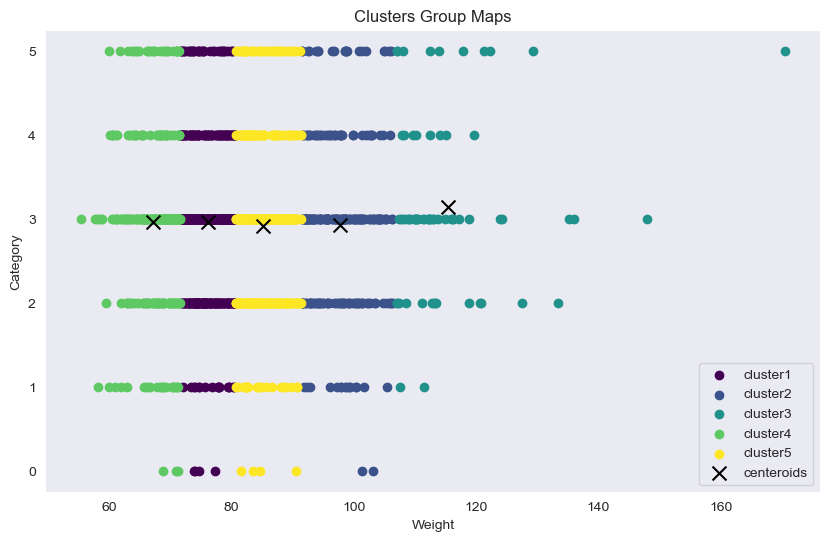

In [107]:
#Plotting Clusters Group Maps
plt.figure(figsize=(10,6))
colors=plt.get_cmap('viridis',k)

for cluster in range(k): #72.5,61.5,64.5
    cluster_data=df[df['cluster']==cluster]
    plt.scatter(cluster_data['weight'],cluster_data['category'],color=colors(cluster),label=f'cluster{cluster+1}')

centeroids=kmeans.cluster_centers_
plt.scatter(centeroids[:,0],centeroids[:,1],color="black",marker="x",s=100,label="centeroids")  #s is the sizze of centeroids
#centeroids gives average value  of each cluster

plt.xlabel('Weight')
plt.ylabel('Category')
plt.title("Clusters Group Maps")
plt.legend()
plt.show()